In [1]:
#Importing required libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, DBSCAN
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [3]:
#Loading the dataset

In [4]:
# Sample dataset: Customer annual income, spending score, and age
data = {'AnnualIncome': [15, 16, 17, 18, 19, 20, 22, 25, 30, 35],
        'SpendingScore': [39, 81, 6, 77, 40, 76, 94, 5, 82, 56],
        'Age': [20, 22, 25, 24, 35, 40, 30, 21, 50, 31]}

df = pd.DataFrame(data)

# Display the first few rows of the dataset
print(df.head())

   AnnualIncome  SpendingScore  Age
0            15             39   20
1            16             81   22
2            17              6   25
3            18             77   24
4            19             40   35


In [5]:
#Preprocessing the data

In [6]:
# Normalize the dataset using StandardScaler
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

# Convert the scaled data back into a DataFrame
df_scaled = pd.DataFrame(df_scaled, columns=['AnnualIncome', 'SpendingScore', 'Age'])
print(df_scaled.head())

   AnnualIncome  SpendingScore       Age
0     -1.086741      -0.546384 -1.074654
1     -0.924540       0.836033 -0.855337
2     -0.762340      -1.632569 -0.526361
3     -0.600140       0.704374 -0.636020
4     -0.437940      -0.513469  0.570225


In [7]:
#Apply k-means clustering

In [8]:
from sklearn.cluster import KMeans

# Apply K-Means clustering with k=3
kmeans = KMeans(n_clusters=3, random_state=42)
df_scaled['KMeans_Cluster'] = kmeans.fit_predict(df_scaled)

# Display the cluster assignments
print(df_scaled.head())

   AnnualIncome  SpendingScore       Age  KMeans_Cluster
0     -1.086741      -0.546384 -1.074654               2
1     -0.924540       0.836033 -0.855337               0
2     -0.762340      -1.632569 -0.526361               2
3     -0.600140       0.704374 -0.636020               0
4     -0.437940      -0.513469  0.570225               2


In [9]:
#Apply DBSCAN clustering

In [10]:
from sklearn.cluster import DBSCAN

# Apply DBSCAN with predefined parameters
dbscan = DBSCAN(eps=0.5, min_samples=2)
df_scaled['DBSCAN_Cluster'] = dbscan.fit_predict(df_scaled)

# Display the cluster assignments and noise (-1)
print(df_scaled.head())

   AnnualIncome  SpendingScore       Age  KMeans_Cluster  DBSCAN_Cluster
0     -1.086741      -0.546384 -1.074654               2              -1
1     -0.924540       0.836033 -0.855337               0               0
2     -0.762340      -1.632569 -0.526361               2              -1
3     -0.600140       0.704374 -0.636020               0               0
4     -0.437940      -0.513469  0.570225               2              -1


In [11]:
#Apply PCA

In [12]:
from sklearn.decomposition import PCA

# Apply PCA to reduce dimensions from 3 to 2
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)

# Convert the PCA result back to a DataFrame for easy handling
df_pca = pd.DataFrame(df_pca, columns=['PCA1', 'PCA2'])
print(df_pca.head())

       PCA1      PCA2
0 -1.724130 -0.546765
1  0.346258 -1.906578
2 -2.043948  0.270090
3  0.471989 -1.549545
4 -0.678157  0.614647


In [13]:
#Visualizing the results

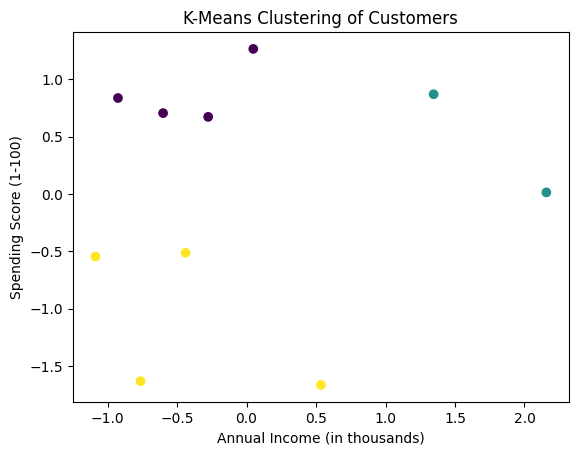

In [14]:
# Plot K-Means clusters
plt.scatter(df_scaled['AnnualIncome'], df_scaled['SpendingScore'], c=df_scaled['KMeans_Cluster'], cmap='viridis')
plt.title('K-Means Clustering of Customers')
plt.xlabel('Annual Income (in thousands)')
plt.ylabel('Spending Score (1-100)')
plt.show()

In [15]:
#Visualize DBSCAN clusters:

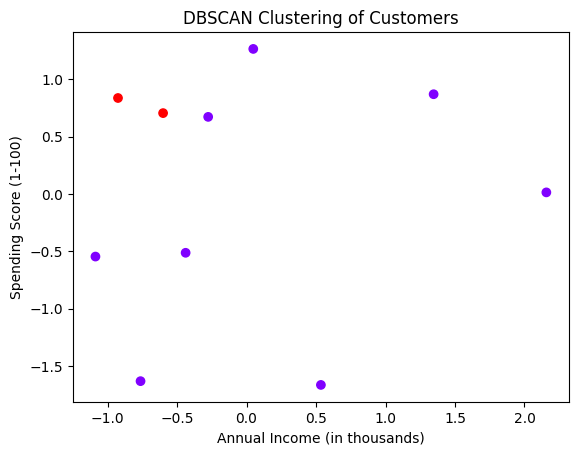

In [16]:
# Plot DBSCAN clusters
plt.scatter(df_scaled['AnnualIncome'], df_scaled['SpendingScore'], c=df_scaled['DBSCAN_Cluster'], cmap='rainbow')
plt.title('DBSCAN Clustering of Customers')
plt.xlabel('Annual Income (in thousands)')
plt.ylabel('Spending Score (1-100)')
plt.show()

In [17]:
#Visualize PCA results:

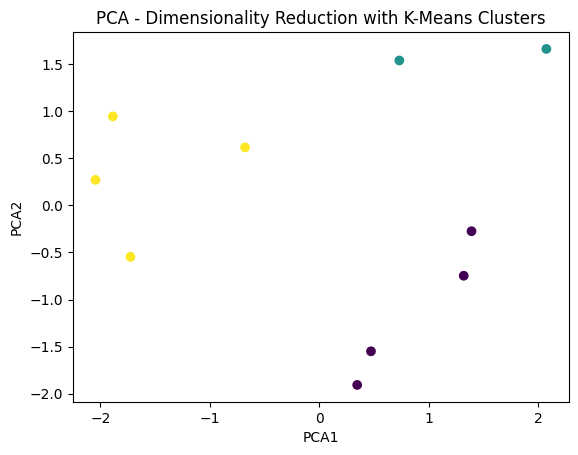

In [18]:
# Plot PCA components
plt.scatter(df_pca['PCA1'], df_pca['PCA2'], c=df_scaled['KMeans_Cluster'], cmap='viridis')
plt.title('PCA - Dimensionality Reduction with K-Means Clusters')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.show()